In [1]:
import os
import sys
import numpy as np

try:
    if changed:
        print("Reloading...")
except:
    sys.path.append("..")
    os.chdir("..")
    changed = True

import src.game as game

%load_ext autoreload
%autoreload 2

pygame 2.5.2 (SDL 2.28.2, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
from src.levels import base_level, get_level_1

env = game.PacManEnv(**base_level, gui=True, ai=True)
env_1 = game.PacManEnv(**get_level_1(), gui=True, ai=True)
obs = env.reset()

from src.agents.random import RandomAgent

random_agent = RandomAgent(env)

for i in range(10000):
    action = random_agent.choose_action(obs)
    obs, reward, done, info = env.step(action)
    if done:
        env.reset()
        print("Done")
        print(info)
        print(i, reward)
        break

Done
{'status': 'lost'}
76 -10.1


In [8]:
from src.trainer import Trainer

# Q-Learning Agent

In [9]:
from src.agents.qlearning import QLearningAgent

qlearning_agent = QLearningAgent(env, alpha=0.1, gamma=0.9, epsilon=0.05)

Training...


  0%|          | 0/5000 [00:00<?, ?it/s]

Episode 4999 - 100-Average Reward: 338.93299999999863: 100%|██████████| 5000/5000 [01:47<00:00, 46.44it/s]


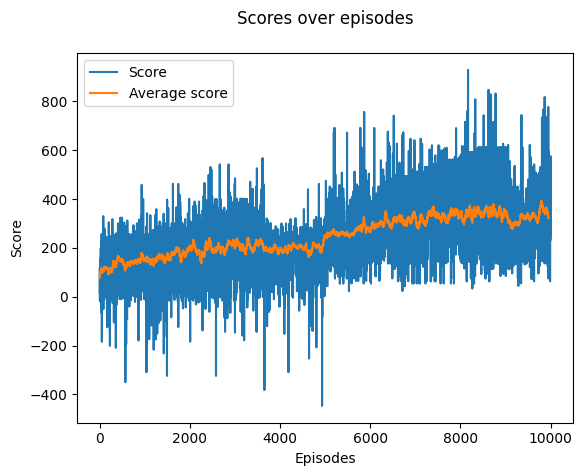

In [6]:
trainer = Trainer(env_1, qlearning_agent, gui=False, run_name="qlearning")
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

Searching for the best hyper parameters:

In [6]:
from collections import defaultdict

n_episodes = 1000
alpha_grid = [0.05, 0.1, 0.3]
gamma_grid = [0.8, 0.9, 0.99]
epsilon_grid = [0.01, 0.05, 0.1]

scores = defaultdict(list)

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            run_name = f"alpha={alpha}_gamma={gamma}_epsilon={epsilon}"
            qlearning_agent = QLearningAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon)
            trainer = Trainer(env, qlearning_agent, gui=False)
            trainer.train(n_episodes, render=False, log_interval=100)
            scores[run_name] = trainer.agent.smoothed_scores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for run_name, score in scores.items():
    plt.plot(score, label=run_name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Episode")
plt.ylabel("Smoothed Total Reward")
plt.title("Q-Learning Hyperparameter Search")
fig.savefig(f"logs/qlearning_hyperparameter_search.png")
plt.show()

maxes = np.array([[run_name, max(score)] for run_name, score in scores.items()])
print(maxes[maxes[:, 1].argmax()])

Training...


Episode 30 - 100-Average Reward: 1222.5806451612902:   3%|▎         | 30/1000 [00:00<00:13, 70.22it/s]

Episode 999 - 100-Average Reward: 2556.0: 100%|██████████| 1000/1000 [00:17<00:00, 58.06it/s]         


Training...


Episode 999 - 100-Average Reward: 2644.0: 100%|██████████| 1000/1000 [00:21<00:00, 45.72it/s]         


Training...


Episode 999 - 100-Average Reward: 2894.0: 100%|██████████| 1000/1000 [00:21<00:00, 45.50it/s]         


Training...


Episode 999 - 100-Average Reward: 2530.0: 100%|██████████| 1000/1000 [00:21<00:00, 46.32it/s]         


Training...


Episode 999 - 100-Average Reward: 2552.0: 100%|██████████| 1000/1000 [00:20<00:00, 48.93it/s]         


Training...


Episode 999 - 100-Average Reward: 2471.0: 100%|██████████| 1000/1000 [00:19<00:00, 50.68it/s]         


Training...


Episode 394 - 100-Average Reward: 1854.0:  39%|███▉      | 394/1000 [00:06<00:11, 52.30it/s]          

# Monte Carlo Agent

In [ ]:
from src.agents.monte_carlo import MonteCarloAgent
mc_agent = MonteCarloAgent(env, epsilon=0.05, gamma=0.99)

Training...


Episode 87 - 100-Average Reward: 1818.1818181818182:   2%|▏         | 87/5000 [00:05<06:08, 13.34it/s]

Episode 4999 - 100-Average Reward: 5885.0: 100%|██████████| 5000/5000 [2:51:19<00:00,  2.06s/it]      


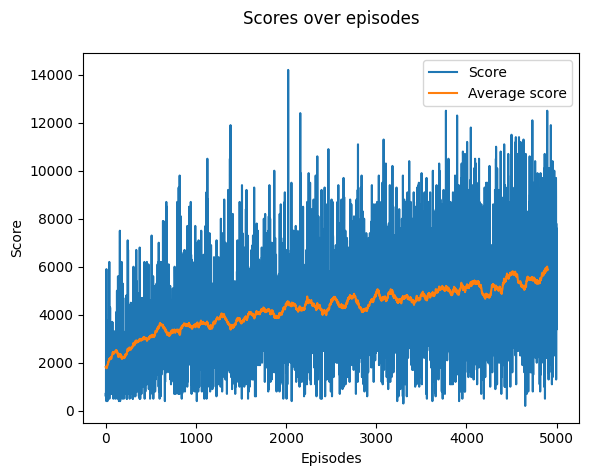

In [ ]:
trainer = Trainer(env, mc_agent, gui=False)
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

Training...


Episode 245 - 100-Average Reward: 3916.0:  49%|████▉     | 246/500 [00:25<00:44,  5.66it/s]          

Episode 499 - 100-Average Reward: 3476.0: 100%|██████████| 500/500 [01:25<00:00,  5.86it/s]


Training...


Episode 499 - 100-Average Reward: 2402.0: 100%|██████████| 500/500 [01:05<00:00,  7.68it/s]          


Training...


Episode 499 - 100-Average Reward: 2633.0: 100%|██████████| 500/500 [01:44<00:00,  4.79it/s]          


Training...


Episode 499 - 100-Average Reward: 2860.0: 100%|██████████| 500/500 [01:29<00:00,  5.58it/s]          


Training...


Episode 499 - 100-Average Reward: 2989.0: 100%|██████████| 500/500 [01:57<00:00,  4.26it/s]          


Training...


Episode 499 - 100-Average Reward: 2802.0: 100%|██████████| 500/500 [01:35<00:00,  5.25it/s]          


Training...


Episode 499 - 100-Average Reward: 5086.0: 100%|██████████| 500/500 [01:45<00:00,  4.72it/s]          


Training...


Episode 499 - 100-Average Reward: 3041.0: 100%|██████████| 500/500 [01:37<00:00,  5.13it/s]          


Training...


Episode 499 - 100-Average Reward: 2833.0: 100%|██████████| 500/500 [01:51<00:00,  4.50it/s]          


Training...


Episode 499 - 100-Average Reward: 3981.0: 100%|██████████| 500/500 [01:46<00:00,  4.69it/s]          


Training...


Episode 499 - 100-Average Reward: 3681.0: 100%|██████████| 500/500 [01:40<00:00,  4.96it/s]          


Training...


Episode 499 - 100-Average Reward: 2661.0: 100%|██████████| 500/500 [01:59<00:00,  4.19it/s]          


Training...


Episode 499 - 100-Average Reward: 3657.0: 100%|██████████| 500/500 [01:24<00:00,  5.95it/s]          


Training...


Episode 499 - 100-Average Reward: 2792.0: 100%|██████████| 500/500 [01:30<00:00,  5.53it/s]          


Training...


Episode 499 - 100-Average Reward: 2600.0: 100%|██████████| 500/500 [02:05<00:00,  3.97it/s]          


Training...


Episode 499 - 100-Average Reward: 5674.0: 100%|██████████| 500/500 [02:11<00:00,  3.80it/s]          


Training...


Episode 499 - 100-Average Reward: 3124.0: 100%|██████████| 500/500 [01:59<00:00,  4.17it/s]          


Training...


Episode 499 - 100-Average Reward: 2637.0: 100%|██████████| 500/500 [02:03<00:00,  4.06it/s]          


Training...


Episode 499 - 100-Average Reward: 2388.0: 100%|██████████| 500/500 [00:41<00:00, 12.05it/s]          


Training...


Episode 499 - 100-Average Reward: 3247.0: 100%|██████████| 500/500 [01:38<00:00,  5.07it/s]          


Training...


Episode 499 - 100-Average Reward: 2457.0: 100%|██████████| 500/500 [01:38<00:00,  5.06it/s]          


Training...


Episode 499 - 100-Average Reward: 4526.0: 100%|██████████| 500/500 [01:46<00:00,  4.68it/s]          


Training...


Episode 499 - 100-Average Reward: 2994.0: 100%|██████████| 500/500 [01:46<00:00,  4.70it/s]          


Training...


Episode 499 - 100-Average Reward: 2797.0: 100%|██████████| 500/500 [01:46<00:00,  4.69it/s]          


Training...


Episode 499 - 100-Average Reward: 4681.0: 100%|██████████| 500/500 [02:04<00:00,  4.03it/s]          


Training...


Episode 499 - 100-Average Reward: 3255.0: 100%|██████████| 500/500 [01:41<00:00,  4.92it/s]          


Training...


Episode 499 - 100-Average Reward: 2589.0: 100%|██████████| 500/500 [01:40<00:00,  4.98it/s]          


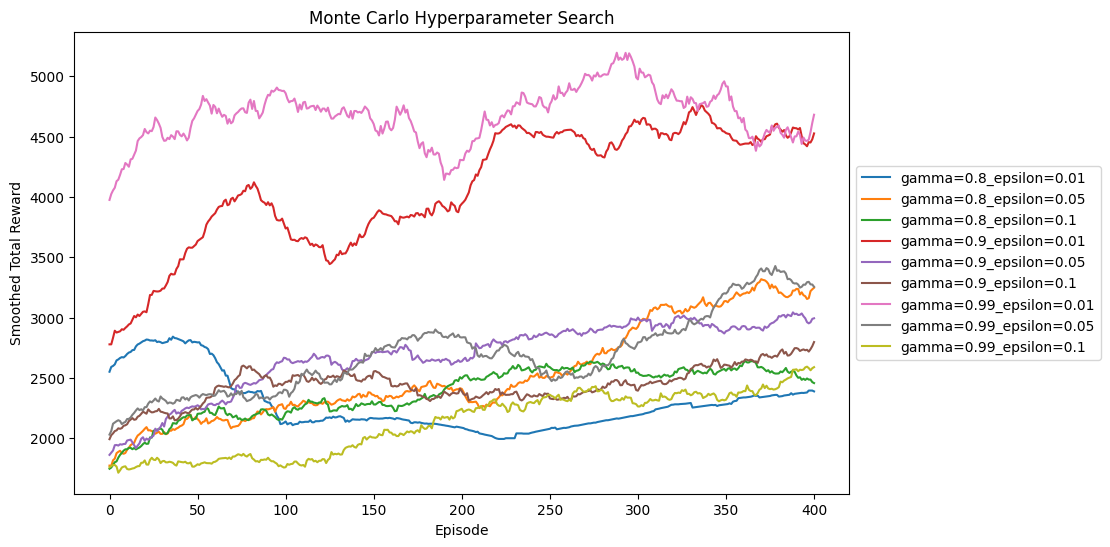

In [ ]:
from collections import defaultdict

n_episodes = 500
gamma_grid = [0.8, 0.9, 0.99]
epsilon_grid = [0.005, 0.01, 0.05]

scores = defaultdict(list)

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            run_name = f"gamma={gamma}_epsilon={epsilon}"
            mc_agent = MonteCarloAgent(env, gamma=gamma, epsilon=epsilon)
            trainer = Trainer(env, mc_agent, gui=False, run_name=run_name)
            trainer.train(n_episodes, render=False, log_interval=100)
            scores[run_name] = trainer.agent.smoothed_scores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for run_name, score in scores.items():
    plt.plot(score, label=run_name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Episode")
plt.ylabel("Smoothed Total Reward")
plt.title("Monte Carlo Hyperparameter Search")
fig.savefig(f"logs/monte_carlo_hyperparameter_search.png")
plt.show()

maxes = np.array([[run_name, max(score)] for run_name, score in scores.items()])
print(maxes[maxes[:, 1].argmax()])

# Sarsa agent

In [ ]:
from src.agents.sarsa import SarsaLambdaAgent
sarsa_agent = SarsaLambdaAgent(env, alpha=0.2, gamma=0.8, epsilon=0.1, lambda_=0.9)

Training...


Episode 99 - 100-Average Reward: 2188.0: 100%|██████████| 100/100 [02:00<00:00,  1.21s/it]           


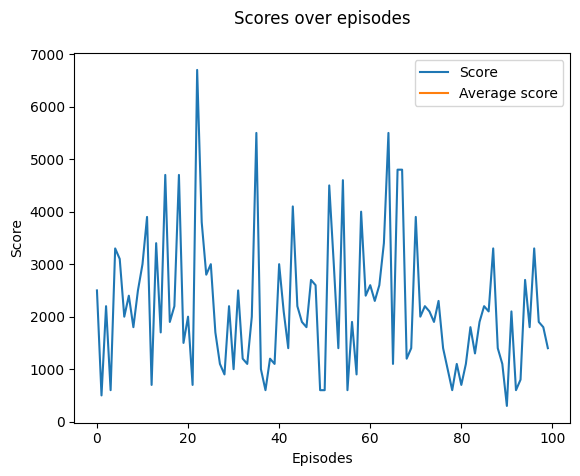

In [ ]:
trainer = Trainer(env, sarsa_agent, gui=False)
trainer.train(100, render=True, log_interval=100)
trainer.plot_score()

Training...


Episode 48 - 100-Average Reward: 2277.5510204081634:  98%|█████████▊| 49/50 [00:24<00:00,  1.40it/s]

Episode 49 - 100-Average Reward: 2290.0: 100%|██████████| 50/50 [00:25<00:00,  1.99it/s]            


Training...


Episode 49 - 100-Average Reward: 1298.0: 100%|██████████| 50/50 [00:06<00:00,  7.49it/s]            


Training...


Episode 49 - 100-Average Reward: 1964.0: 100%|██████████| 50/50 [00:10<00:00,  4.59it/s]            


Training...


Episode 49 - 100-Average Reward: 1480.0: 100%|██████████| 50/50 [00:10<00:00,  4.92it/s]            


Training...


Episode 49 - 100-Average Reward: 1640.0: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]            


Training...


Episode 49 - 100-Average Reward: 1590.0: 100%|██████████| 50/50 [00:10<00:00,  4.76it/s]            


Training...


Episode 49 - 100-Average Reward: 1508.0: 100%|██████████| 50/50 [00:08<00:00,  6.25it/s]            


Training...


Episode 49 - 100-Average Reward: 1808.0: 100%|██████████| 50/50 [00:19<00:00,  2.57it/s]            


Training...


Episode 49 - 100-Average Reward: 1786.0: 100%|██████████| 50/50 [00:21<00:00,  2.34it/s]            


Training...


Episode 49 - 100-Average Reward: 1114.0: 100%|██████████| 50/50 [00:02<00:00, 22.31it/s]            


Training...


Episode 49 - 100-Average Reward: 646.0: 100%|██████████| 50/50 [00:01<00:00, 30.85it/s]             


Training...


Episode 49 - 100-Average Reward: 1912.0: 100%|██████████| 50/50 [00:09<00:00,  5.53it/s]            


Training...


Episode 49 - 100-Average Reward: 2018.0: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]            


Training...


Episode 49 - 100-Average Reward: 1700.0: 100%|██████████| 50/50 [00:18<00:00,  2.70it/s]            


Training...


Episode 49 - 100-Average Reward: 1424.0: 100%|██████████| 50/50 [00:10<00:00,  4.68it/s]            


Training...


Episode 49 - 100-Average Reward: 1468.0: 100%|██████████| 50/50 [00:16<00:00,  3.07it/s]            


Training...


Episode 49 - 100-Average Reward: 1514.0: 100%|██████████| 50/50 [00:13<00:00,  3.61it/s]            


Training...


Episode 49 - 100-Average Reward: 1130.0: 100%|██████████| 50/50 [00:08<00:00,  5.68it/s]            


Training...


Episode 49 - 100-Average Reward: 2148.0: 100%|██████████| 50/50 [00:07<00:00,  6.58it/s]            


Training...


Episode 49 - 100-Average Reward: 2056.0: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]            


Training...


Episode 49 - 100-Average Reward: 1122.0: 100%|██████████| 50/50 [00:05<00:00,  9.25it/s]            


Training...


Episode 49 - 100-Average Reward: 1758.0: 100%|██████████| 50/50 [00:09<00:00,  5.07it/s]            


Training...


Episode 49 - 100-Average Reward: 1262.0: 100%|██████████| 50/50 [00:06<00:00,  7.19it/s]            


Training...


Episode 49 - 100-Average Reward: 1630.0: 100%|██████████| 50/50 [00:20<00:00,  2.42it/s]            


Training...


Episode 49 - 100-Average Reward: 1674.0: 100%|██████████| 50/50 [00:20<00:00,  2.46it/s]            


Training...


Episode 49 - 100-Average Reward: 998.0: 100%|██████████| 50/50 [00:04<00:00, 10.32it/s]            


Training...


Episode 49 - 100-Average Reward: 1476.0: 100%|██████████| 50/50 [00:14<00:00,  3.45it/s]            


Training...


Episode 49 - 100-Average Reward: 2648.0: 100%|██████████| 50/50 [00:41<00:00,  1.20it/s]            


Training...


Episode 49 - 100-Average Reward: 1040.0: 100%|██████████| 50/50 [00:02<00:00, 20.88it/s]            


Training...


Episode 49 - 100-Average Reward: 1154.0: 100%|██████████| 50/50 [00:05<00:00,  9.32it/s]            


Training...


Episode 49 - 100-Average Reward: 1792.0: 100%|██████████| 50/50 [00:18<00:00,  2.76it/s]            


Training...


Episode 49 - 100-Average Reward: 1994.0: 100%|██████████| 50/50 [00:21<00:00,  2.34it/s]            


Training...


Episode 49 - 100-Average Reward: 1480.0: 100%|██████████| 50/50 [00:07<00:00,  6.31it/s]            


Training...


Episode 49 - 100-Average Reward: 1442.0: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]            


Training...


Episode 49 - 100-Average Reward: 1830.0: 100%|██████████| 50/50 [00:18<00:00,  2.74it/s]            


Training...


Episode 49 - 100-Average Reward: 1478.0: 100%|██████████| 50/50 [00:19<00:00,  2.63it/s]            


Training...


Episode 49 - 100-Average Reward: 1778.0: 100%|██████████| 50/50 [00:03<00:00, 15.83it/s]            


Training...


Episode 49 - 100-Average Reward: 2428.0: 100%|██████████| 50/50 [00:13<00:00,  3.66it/s]            


Training...


Episode 49 - 100-Average Reward: 994.0: 100%|██████████| 50/50 [00:02<00:00, 17.56it/s]            


Training...


Episode 49 - 100-Average Reward: 1930.0: 100%|██████████| 50/50 [00:28<00:00,  1.76it/s]            


Training...


Episode 49 - 100-Average Reward: 1676.0: 100%|██████████| 50/50 [00:19<00:00,  2.57it/s]            


Training...


Episode 49 - 100-Average Reward: 1226.0: 100%|██████████| 50/50 [00:08<00:00,  5.81it/s]            


Training...


Episode 49 - 100-Average Reward: 1490.0: 100%|██████████| 50/50 [00:10<00:00,  4.60it/s]            


Training...


Episode 49 - 100-Average Reward: 1704.0: 100%|██████████| 50/50 [00:21<00:00,  2.37it/s]            


Training...


Episode 49 - 100-Average Reward: 1740.0: 100%|██████████| 50/50 [00:25<00:00,  1.94it/s]            


Training...


Episode 49 - 100-Average Reward: 2190.0: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]            


Training...


Episode 49 - 100-Average Reward: 708.0: 100%|██████████| 50/50 [00:02<00:00, 21.88it/s]            


Training...


Episode 49 - 100-Average Reward: 1240.0: 100%|██████████| 50/50 [00:04<00:00, 10.12it/s]            


Training...


Episode 49 - 100-Average Reward: 1468.0: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s]            


Training...


Episode 49 - 100-Average Reward: 1252.0: 100%|██████████| 50/50 [00:06<00:00,  7.60it/s]            


Training...


Episode 49 - 100-Average Reward: 1168.0: 100%|██████████| 50/50 [00:06<00:00,  7.83it/s]            


Training...


Episode 49 - 100-Average Reward: 2058.0: 100%|██████████| 50/50 [00:40<00:00,  1.25it/s]            


Training...


Episode 49 - 100-Average Reward: 1494.0: 100%|██████████| 50/50 [00:13<00:00,  3.71it/s]            


Training...


Episode 49 - 100-Average Reward: 1390.0: 100%|██████████| 50/50 [00:19<00:00,  2.53it/s]            


Training...


Episode 49 - 100-Average Reward: 2302.0: 100%|██████████| 50/50 [00:10<00:00,  4.68it/s]            


Training...


Episode 49 - 100-Average Reward: 2666.0: 100%|██████████| 50/50 [00:27<00:00,  1.83it/s]            


Training...


Episode 49 - 100-Average Reward: 2298.0: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]            


Training...


Episode 49 - 100-Average Reward: 2224.0: 100%|██████████| 50/50 [00:26<00:00,  1.91it/s]            


Training...


Episode 49 - 100-Average Reward: 1368.0: 100%|██████████| 50/50 [00:11<00:00,  4.32it/s]            


Training...


Episode 49 - 100-Average Reward: 1418.0: 100%|██████████| 50/50 [00:11<00:00,  4.36it/s]            


Training...


Episode 49 - 100-Average Reward: 1664.0: 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]            


Training...


Episode 49 - 100-Average Reward: 2034.0: 100%|██████████| 50/50 [00:38<00:00,  1.30it/s]            


Training...


Episode 49 - 100-Average Reward: 2104.0: 100%|██████████| 50/50 [00:46<00:00,  1.06it/s]            


Training...


Episode 49 - 100-Average Reward: 2442.0: 100%|██████████| 50/50 [00:33<00:00,  1.47it/s]            


Training...


Episode 49 - 100-Average Reward: 856.0: 100%|██████████| 50/50 [00:02<00:00, 21.88it/s]            


Training...


Episode 49 - 100-Average Reward: 1022.0: 100%|██████████| 50/50 [00:02<00:00, 21.54it/s]            


Training...


Episode 49 - 100-Average Reward: 1824.0: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]            


Training...


Episode 49 - 100-Average Reward: 1406.0: 100%|██████████| 50/50 [00:08<00:00,  6.04it/s]            


Training...


Episode 49 - 100-Average Reward: 1406.0: 100%|██████████| 50/50 [00:09<00:00,  5.42it/s]            


Training...


Episode 49 - 100-Average Reward: 1696.0: 100%|██████████| 50/50 [00:22<00:00,  2.21it/s]            


Training...


Episode 49 - 100-Average Reward: 1958.0: 100%|██████████| 50/50 [00:28<00:00,  1.78it/s]            


Training...


Episode 49 - 100-Average Reward: 2016.0: 100%|██████████| 50/50 [00:33<00:00,  1.50it/s]            


Training...


Episode 49 - 100-Average Reward: 1694.0: 100%|██████████| 50/50 [00:06<00:00,  7.45it/s]            


Training...


Episode 49 - 100-Average Reward: 1946.0: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]            


Training...


Episode 49 - 100-Average Reward: 1520.0: 100%|██████████| 50/50 [00:04<00:00, 10.56it/s]            


Training...


Episode 49 - 100-Average Reward: 1348.0: 100%|██████████| 50/50 [00:11<00:00,  4.33it/s]            


Training...


Episode 49 - 100-Average Reward: 1866.0: 100%|██████████| 50/50 [00:22<00:00,  2.25it/s]            


Training...


Episode 49 - 100-Average Reward: 1476.0: 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]            


Training...


Episode 49 - 100-Average Reward: 1126.0: 100%|██████████| 50/50 [00:07<00:00,  6.27it/s]            


Training...


Episode 49 - 100-Average Reward: 1414.0: 100%|██████████| 50/50 [00:15<00:00,  3.33it/s]            


Training...


Episode 49 - 100-Average Reward: 1850.0: 100%|██████████| 50/50 [00:36<00:00,  1.36it/s]            


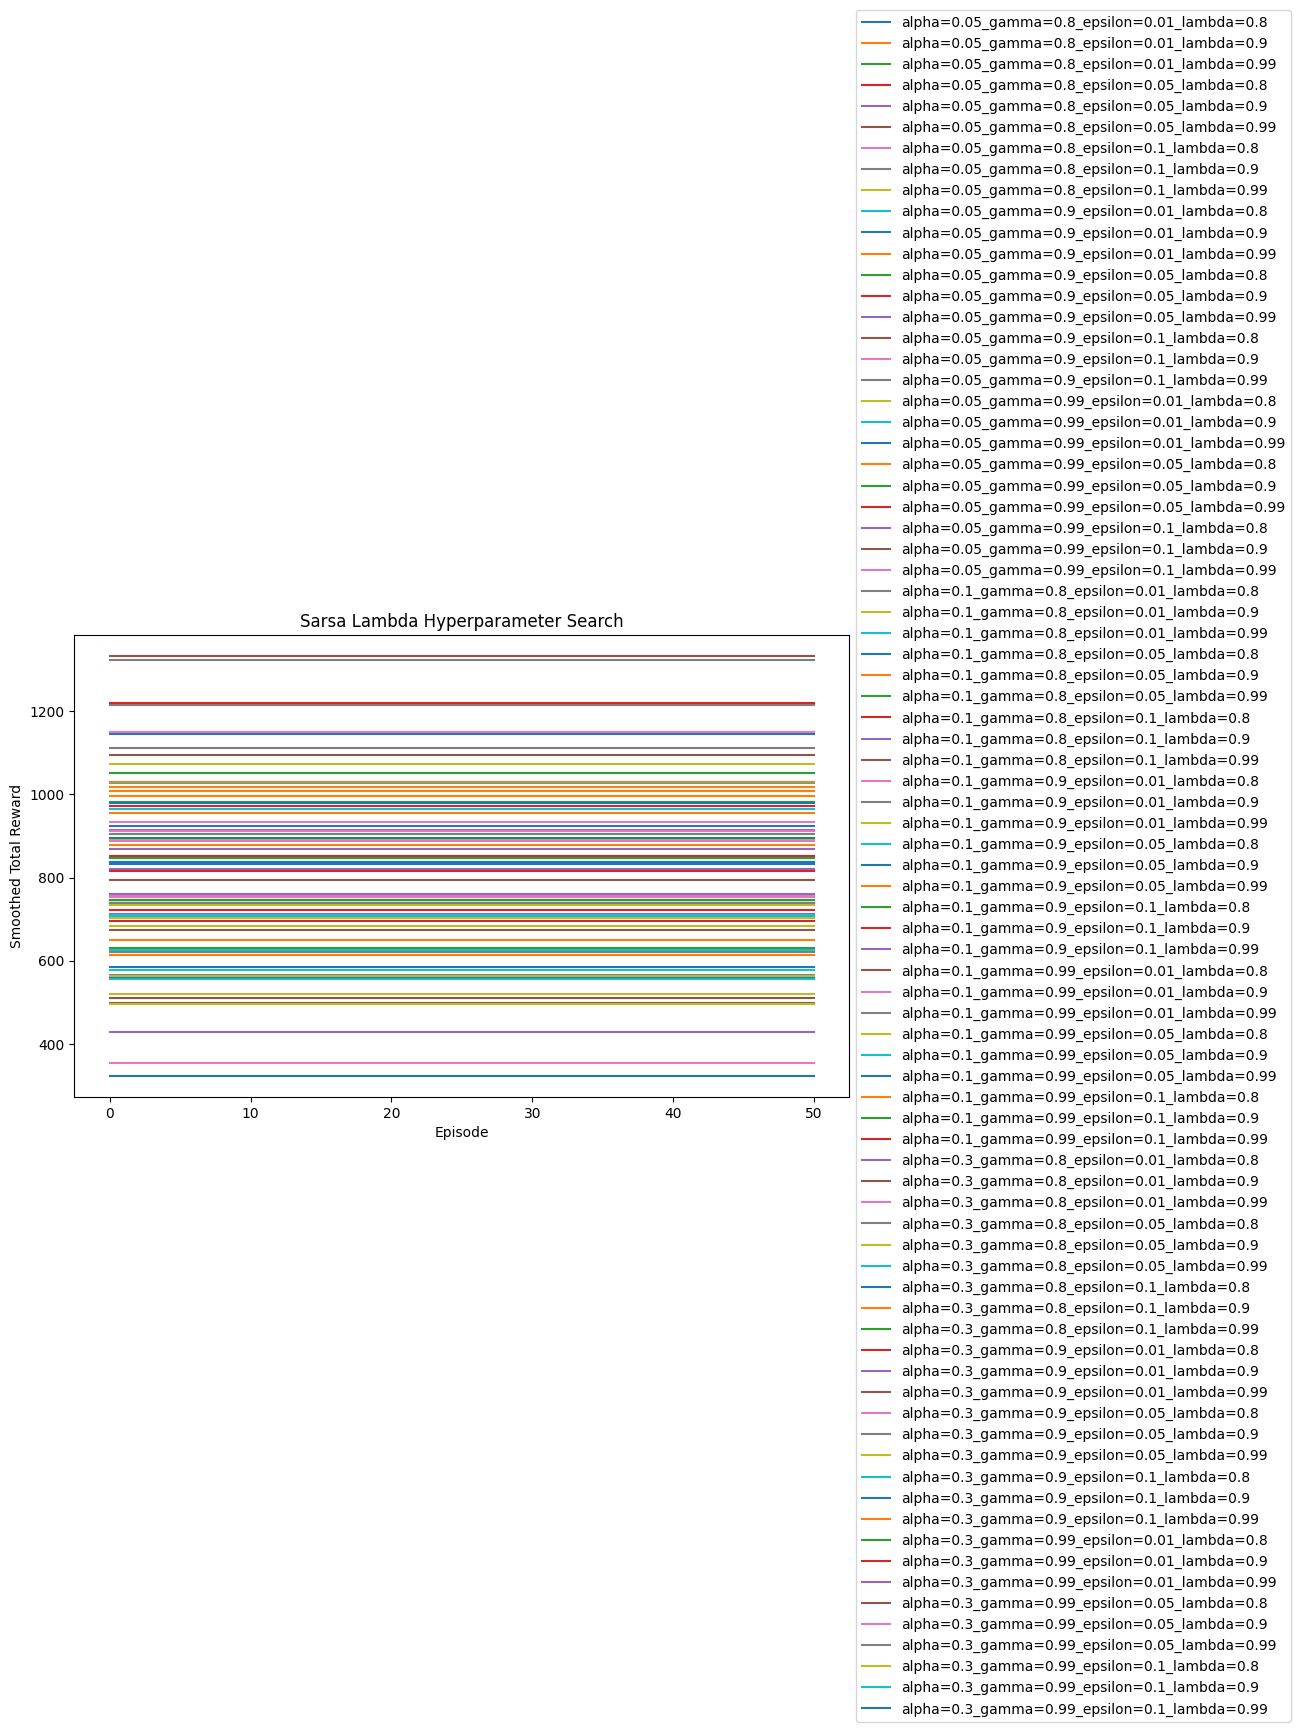

In [ ]:
from collections import defaultdict

n_episodes = 100
alpha_grid = [0.1, 0.3]
gamma_grid = [0.9, 0.99]
epsilon_grid = [0.01, 0.1]
lambda_ = 0.9

scores = defaultdict(list)

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            run_name = f"alpha={alpha}_gamma={gamma}_epsilon={epsilon}_lambda={lambda_}"
            sarsa_agent = SarsaLambdaAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon, lambda_=lambda_)
            trainer = Trainer(env, sarsa_agent, gui=False, run_name=run_name)
            trainer.train(n_episodes, render=False, log_interval=100)
            scores[run_name] = trainer.agent.smoothed_scores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for run_name, score in scores.items():
    plt.plot(score, label=run_name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Episode")
plt.ylabel("Smoothed Total Reward")
plt.title("Sarsa Lambda Hyperparameter Search")
fig.savefig(f"logs/sarsa_lambda_hyperparameter_search.png")
plt.show()

maxes = np.array([[run_name, max(score)] for run_name, score in scores.items()])
print(maxes[maxes[:, 1].argmax()])

# DQN agent

In [13]:
from src.agents.dqn import DQNAgent
import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

dqn_agent = DQNAgent(env, alpha=5e-3, gamma=0.99, epsilon=0.1, batch_size=4, device=device)
dqn_agent.model.to(device)

Sequential(
  (0): Linear(in_features=25, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=24, bias=True)
  (3): ReLU()
  (4): Linear(in_features=24, out_features=5, bias=True)
)

Training...


Episode 250 - 100-Average Reward: 531.0:  50%|█████     | 251/500 [00:49<00:46,  5.32it/s]          

Episode 499 - 100-Average Reward: 544.0: 100%|██████████| 500/500 [01:37<00:00,  5.13it/s]


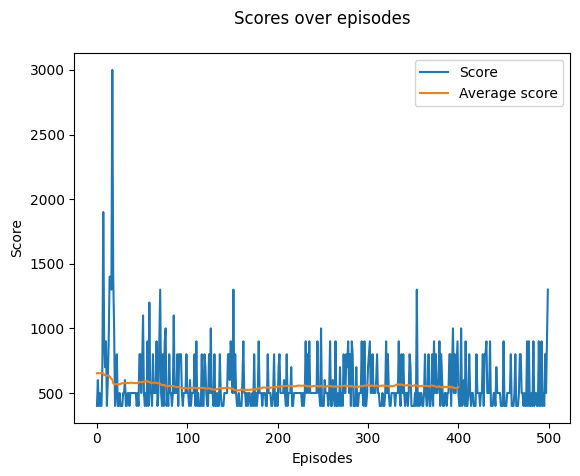

In [14]:
import tqdm
tqdm.tqdm._instances.clear()

trainer = Trainer(env, dqn_agent, gui=False, run_name="dqn")
trainer.train(500, render=True, log_interval=100)
trainer.plot_score()

Training...


Episode 99 - 100-Average Reward: 1286.0: 100%|██████████| 100/100 [00:28<00:00,  3.45it/s]           


Training...


Episode 99 - 100-Average Reward: 1241.0: 100%|██████████| 100/100 [00:27<00:00,  3.64it/s]           


Training...


Episode 99 - 100-Average Reward: 1251.0: 100%|██████████| 100/100 [00:29<00:00,  3.44it/s]           


Training...


Episode 99 - 100-Average Reward: 642.0: 100%|██████████| 100/100 [00:26<00:00,  3.74it/s]            


Training...


Episode 99 - 100-Average Reward: 1142.0: 100%|██████████| 100/100 [00:29<00:00,  3.39it/s]           


Training...


Episode 99 - 100-Average Reward: 1213.0: 100%|██████████| 100/100 [00:28<00:00,  3.53it/s]           


Training...


Episode 99 - 100-Average Reward: 458.0: 100%|██████████| 100/100 [00:20<00:00,  4.95it/s]            


Training...


Episode 99 - 100-Average Reward: 824.0: 100%|██████████| 100/100 [00:27<00:00,  3.62it/s]            


Training...


Episode 99 - 100-Average Reward: 1320.0: 100%|██████████| 100/100 [00:41<00:00,  2.39it/s]           


Training...


Episode 99 - 100-Average Reward: 1754.0: 100%|██████████| 100/100 [00:39<00:00,  2.55it/s]           


Training...


Episode 99 - 100-Average Reward: 1258.0: 100%|██████████| 100/100 [00:31<00:00,  3.18it/s]           


Training...


Episode 99 - 100-Average Reward: 1353.0: 100%|██████████| 100/100 [00:34<00:00,  2.89it/s]           


Training...


Episode 99 - 100-Average Reward: 1185.0: 100%|██████████| 100/100 [00:33<00:00,  3.02it/s]           


Training...


Episode 99 - 100-Average Reward: 1434.0: 100%|██████████| 100/100 [00:30<00:00,  3.30it/s]           


Training...


Episode 99 - 100-Average Reward: 1650.0: 100%|██████████| 100/100 [00:44<00:00,  2.23it/s]           


Training...


Episode 99 - 100-Average Reward: 803.0: 100%|██████████| 100/100 [00:29<00:00,  3.34it/s]           


Training...


Episode 99 - 100-Average Reward: 948.0: 100%|██████████| 100/100 [00:32<00:00,  3.07it/s]            


Training...


Episode 99 - 100-Average Reward: 997.0: 100%|██████████| 100/100 [00:33<00:00,  2.99it/s]            


Training...


Episode 99 - 100-Average Reward: 2602.0: 100%|██████████| 100/100 [00:23<00:00,  4.33it/s]           


Training...


Episode 99 - 100-Average Reward: 3425.0: 100%|██████████| 100/100 [00:40<00:00,  2.48it/s]           


Training...


Episode 99 - 100-Average Reward: 2701.0: 100%|██████████| 100/100 [00:32<00:00,  3.09it/s]           


Training...


Episode 99 - 100-Average Reward: 2555.0: 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]           


Training...


Episode 99 - 100-Average Reward: 2992.0: 100%|██████████| 100/100 [00:37<00:00,  2.69it/s]           


Training...


Episode 99 - 100-Average Reward: 2067.0: 100%|██████████| 100/100 [00:25<00:00,  3.87it/s]           


Training...


Episode 99 - 100-Average Reward: 1035.0: 100%|██████████| 100/100 [00:24<00:00,  4.16it/s]           


Training...


Episode 99 - 100-Average Reward: 1453.0: 100%|██████████| 100/100 [00:37<00:00,  2.66it/s]           


Training...


Episode 99 - 100-Average Reward: 1428.0: 100%|██████████| 100/100 [00:32<00:00,  3.10it/s]           


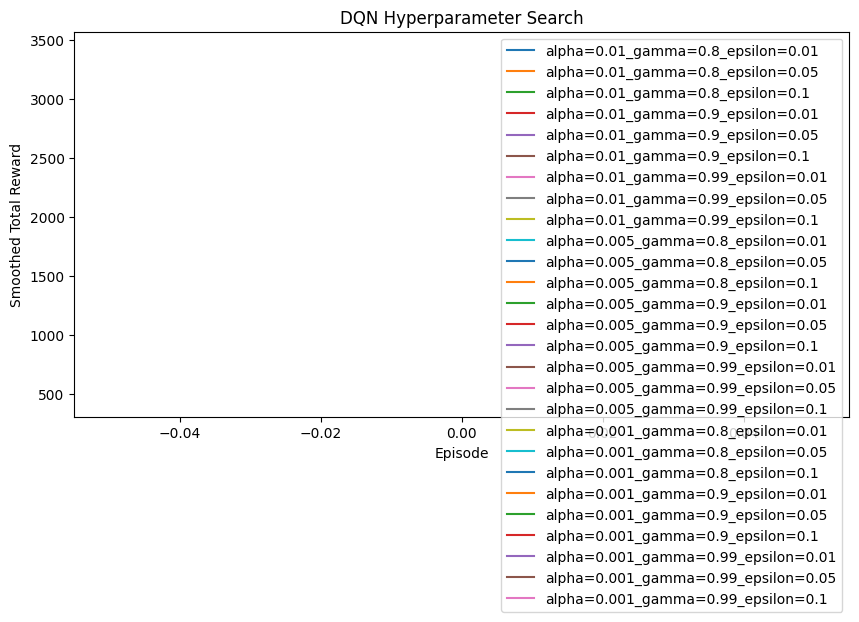

In [15]:
from collections import defaultdict

n_episodes = 200
alpha_grid = [1e-2, 5e-3, 1e-3]
gamma_grid = [0.8, 0.9, 0.99]
epsilon_grid = [0.01, 0.05, 0.1]

scores = defaultdict(list)

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            run_name = f"alpha={alpha}_gamma={gamma}_epsilon={epsilon}"
            dqn_agent = DQNAgent(env, alpha=alpha, gamma=gamma, epsilon=epsilon, batch_size=4, device=device)
            dqn_agent.model.to(device)
            trainer = Trainer(env, dqn_agent, gui=False, run_name=run_name)
            trainer.train(n_episodes, render=False, log_interval=100)
            scores[run_name] = trainer.agent.smoothed_scores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for run_name, score in scores.items():
    plt.plot(score, label=run_name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Episode")
plt.ylabel("Smoothed Total Reward")
plt.title("DQN Hyperparameter Search")
fig.savefig(f"logs/dqn_hyperparameter_search.png")
plt.show()

maxes = np.array([[run_name, max(score)] for run_name, score in scores.items()])
print(maxes[maxes[:, 1].argmax()])

# $\epsilon$-greedy agent

In [22]:
from src.agents.greedy import EpsilonGreedyAgentConstantStepSize
eps_agent = EpsilonGreedyAgentConstantStepSize(env, epsilon=0.1, step_size=0.1)


Training...


Episode 0 - 100-Average Reward: 1433.0:   0%|          | 0/5000 [00:00<?, ?it/s]

Episode 4999 - 100-Average Reward: 1877.0: 100%|██████████| 5000/5000 [01:42<00:00, 49.00it/s]


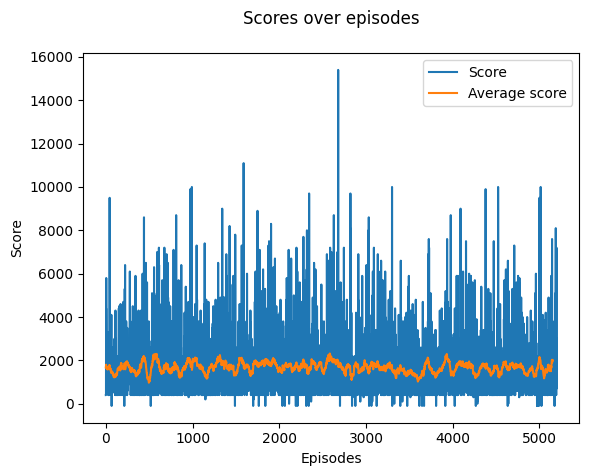

In [25]:
import tqdm
tqdm.tqdm._instances.clear()

trainer = Trainer(env, eps_agent, gui=False)
trainer.train(5000, render=True, log_interval=100)
trainer.plot_score()

Training...


Episode 4999 - 100-Average Reward: 641.0: 100%|██████████| 5000/5000 [01:25<00:00, 58.61it/s]


Training...


Episode 4999 - 100-Average Reward: 1249.0: 100%|██████████| 5000/5000 [01:32<00:00, 54.30it/s]


Training...


Episode 4999 - 100-Average Reward: 1632.0: 100%|██████████| 5000/5000 [01:30<00:00, 54.99it/s]


Training...


Episode 4999 - 100-Average Reward: 703.0: 100%|██████████| 5000/5000 [01:28<00:00, 56.35it/s]


Training...


Episode 4999 - 100-Average Reward: 1302.0: 100%|██████████| 5000/5000 [01:37<00:00, 51.37it/s]


Training...


Episode 4999 - 100-Average Reward: 2002.0: 100%|██████████| 5000/5000 [01:35<00:00, 52.60it/s]


Training...


Episode 4999 - 100-Average Reward: 993.0: 100%|██████████| 5000/5000 [01:32<00:00, 54.23it/s]


Training...


Episode 4999 - 100-Average Reward: 1689.0: 100%|██████████| 5000/5000 [01:37<00:00, 51.42it/s]


Training...


Episode 4999 - 100-Average Reward: 3149.0: 100%|██████████| 5000/5000 [01:40<00:00, 49.51it/s]


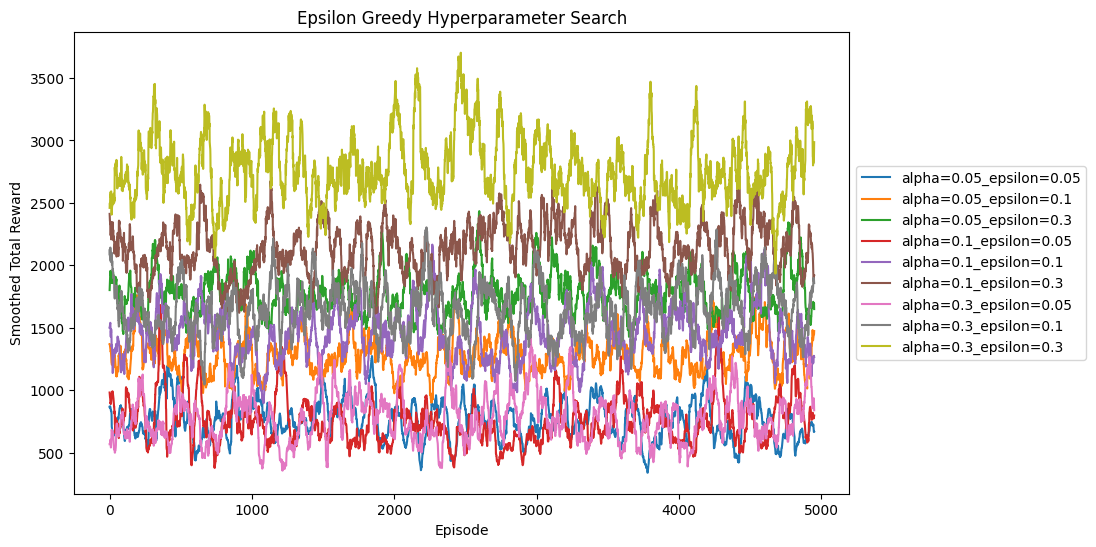

In [27]:
from collections import defaultdict

n_episodes = 2000
alpha_grid = [0.05, 0.1, 0.3]
epsilon_grid = [0.05, 0.1, 0.3]

scores = defaultdict(list)

for alpha in alpha_grid:
    for epsilon in epsilon_grid:
        run_name = f"alpha={alpha}_epsilon={epsilon}"
        eps_agent = EpsilonGreedyAgentConstantStepSize(env, epsilon=epsilon, step_size=alpha)
        trainer = Trainer(env, eps_agent, gui=False, run_name=run_name)
        trainer.train(n_episodes, render=False, log_interval=100)
        scores[run_name] = trainer.agent.smoothed_scores

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for run_name, score in scores.items():
    plt.plot(score, label=run_name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Episode")
plt.ylabel("Smoothed Total Reward")
plt.title("Epsilon Greedy Hyperparameter Search")
fig.savefig(f"logs/eps_greedy_hyperparameter_search.png")
plt.show()

maxes = np.array([[run_name, max(score)] for run_name, score in scores.items()])
print(maxes[maxes[:, 1].argmax()])